<a href="https://colab.research.google.com/github/PranaviImmanni/Portfolio/blob/main/Student_Performance_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python Analytics for Student Performance Management

In [ ]:

# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and Preview the Data
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"
data = pd.read_csv(url)
data.head()
data.columns = data.columns.str.strip().str.lower()

In [ ]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
# Inspect and clean column names
print(data.columns)
data.columns = data.columns.str.strip()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [ ]:
# Normalize Column Names
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

In [ ]:
# Add average score columns
data['average_score'] = data[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [ ]:
# Check for missing values
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
average_score,0


In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
# Summary Statistics
data.describe()

,math_score,reading_score,writing_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [ ]:
data.tail()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333
999,female,group D,some college,free/reduced,none,77,86,86,83.000000


STUDENT CLASS


In [ ]:
# Creating Student Class

class Student:
    def __init__(self, gender, race_ethnicity, parental_education, test_prep, math_score, reading_score, writing_score):
        self.gender = gender
        self.race_ethnicity = race_ethnicity
        self.parental_education = parental_education
        self.test_prep = test_prep
        self.math_score = math_score
        self.reading_score = reading_score
        self.writing_score = writing_score

    def average_score(self):
        return (self.math_score + self.reading_score + self.writing_score) / 3

**VISUALIZATIONS**

*Gender* Vs. Scores

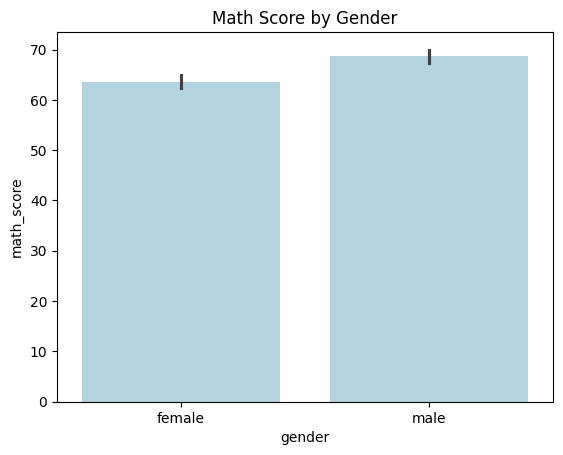

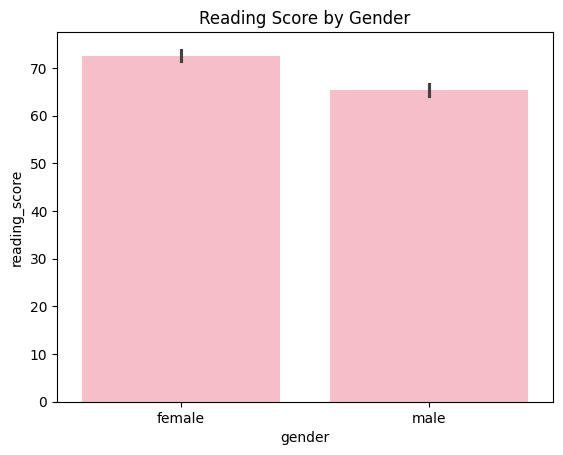

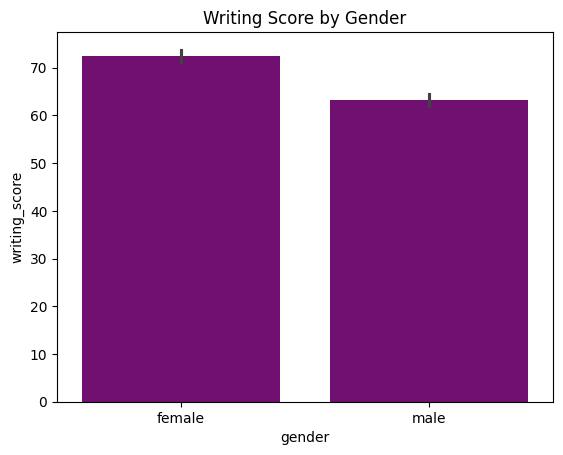

In [ ]:
# Math Score by Gender
sns.barplot(x='gender', y='math_score', data=data, color='lightblue')
plt.title("Math Score by Gender")
plt.show()

# Reading Score by Gender
sns.barplot(x='gender', y='reading_score', data=data, color='lightpink')
plt.title("Reading Score by Gender")
plt.show()

# Writing Score by Gender
sns.barplot(x='gender', y='writing_score', data=data, color='purple')
plt.title("Writing Score by Gender")
plt.show()

Test Prep Vs Scores

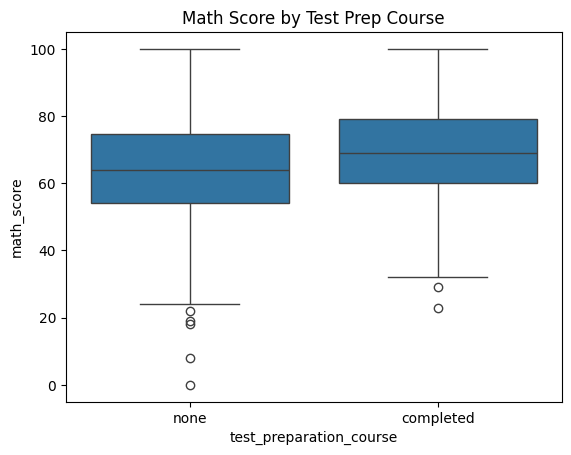

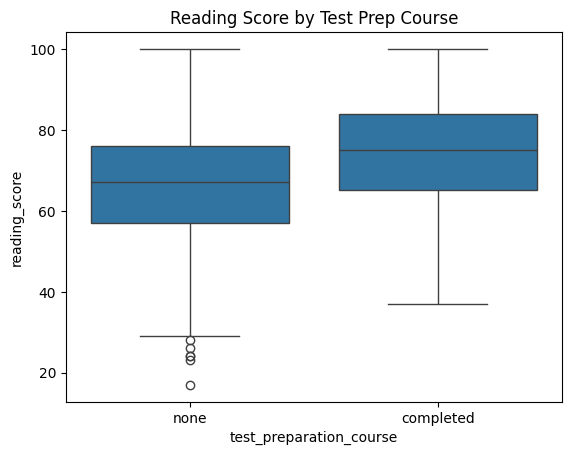

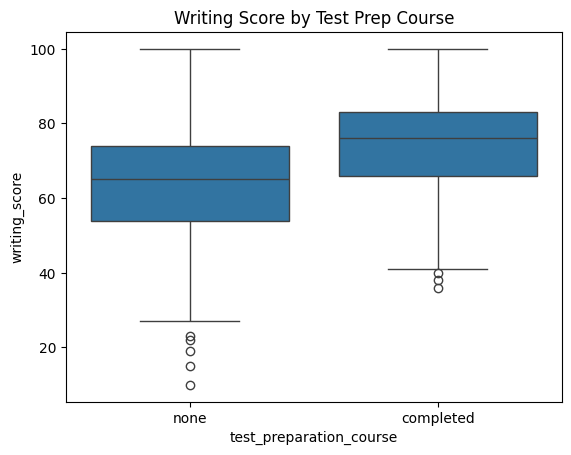

In [ ]:
# boxplots by test preparation course
sns.boxplot(x='test_preparation_course', y='math_score', data=data)
plt.title("Math Score by Test Prep Course")
plt.show()

sns.boxplot(x='test_preparation_course', y='reading_score', data=data)
plt.title("Reading Score by Test Prep Course")
plt.show()

sns.boxplot(x='test_preparation_course', y='writing_score', data=data)
plt.title("Writing Score by Test Prep Course")
plt.show()

Parent education (degrees) vs Scores

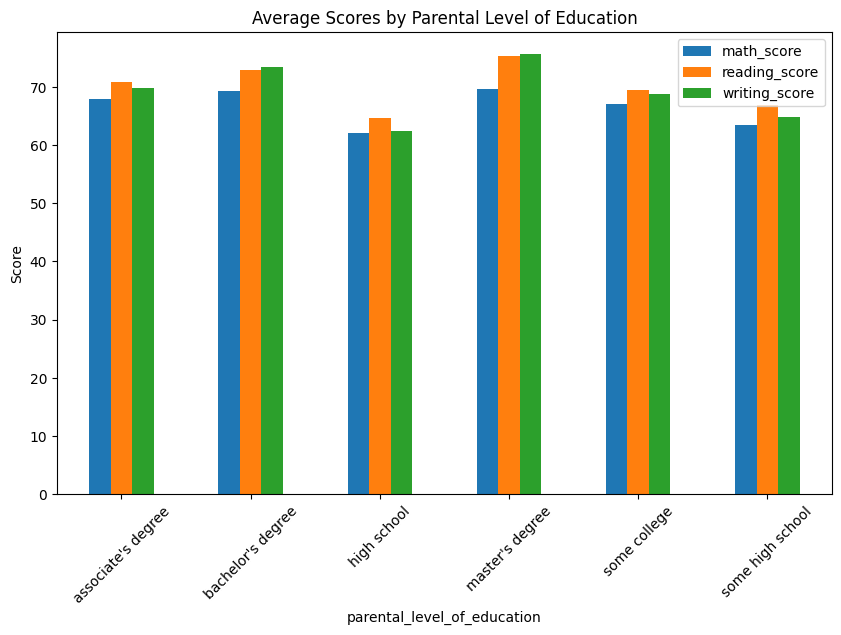

In [ ]:
# group and plot average scores by parental education
parental_avg = data.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()
parental_avg.plot(kind='bar', figsize=(10,6))
plt.title("Average Scores by Parental Level of Education")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()



<ipython-input-16-06e24b3a0142>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='parental_level_of_education', y='average_score', ci=None)


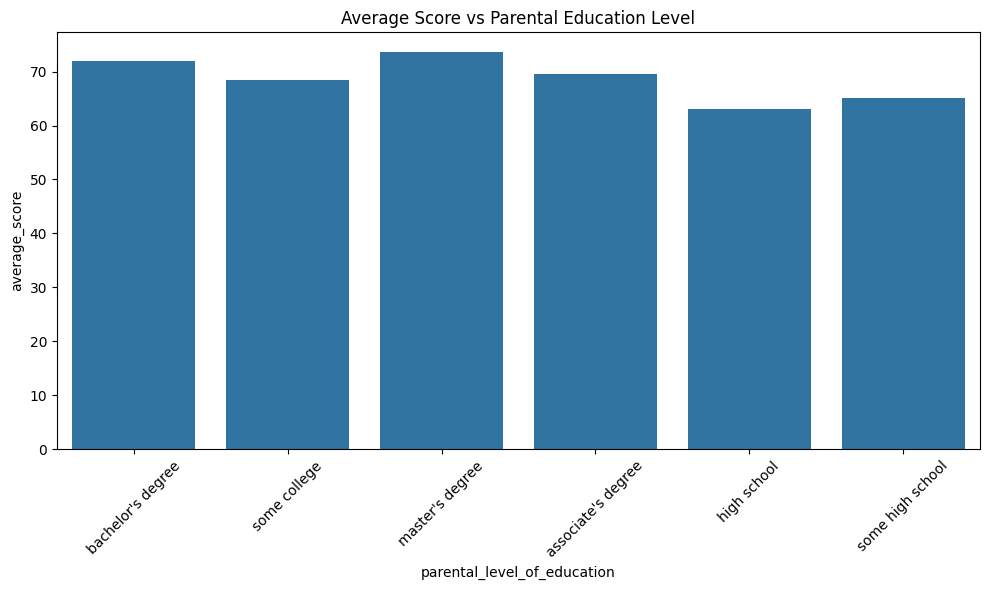

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='parental_level_of_education', y='average_score', ci=None)
plt.xticks(rotation=45)
plt.title('Average Score vs Parental Education Level')
plt.tight_layout()
plt.show()

Correlation Heatmap of the scores

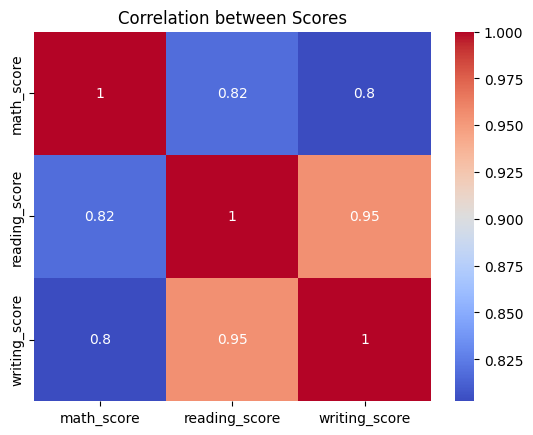

In [ ]:
# create a heatmap of score correlations
scores = data[['math_score', 'reading_score', 'writing_score']]
sns.heatmap(scores.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Scores")
plt.show()

Lunch distrubution

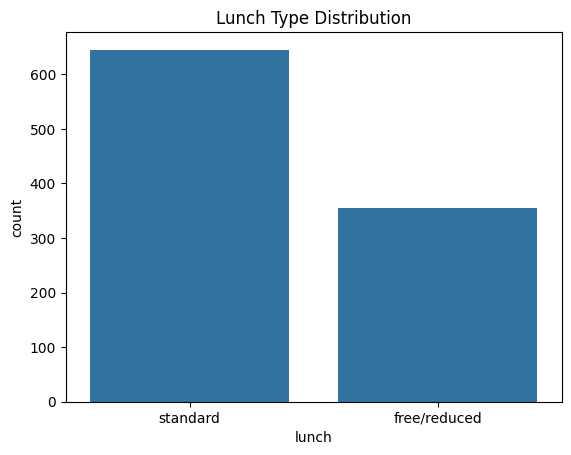

In [ ]:
# Countplot for lunch type
sns.countplot(x='lunch', data=data)
plt.title("Lunch Type Distribution")
plt.show()

Comparison of Males/Females, with gender and the count of people.

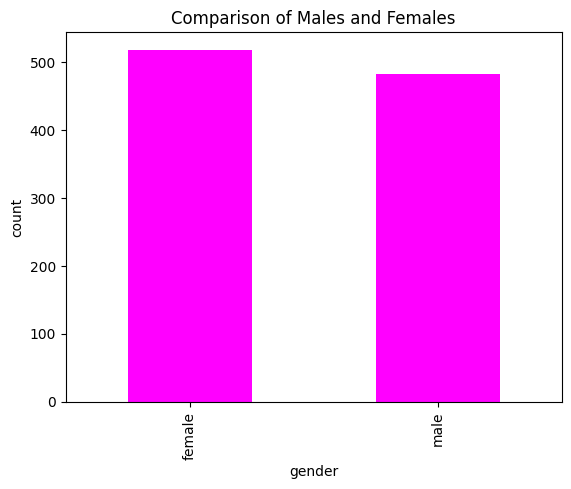

In [ ]:
# visualising the number of male and female in the dataset

data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'magenta')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

Comparison of different groups with count.


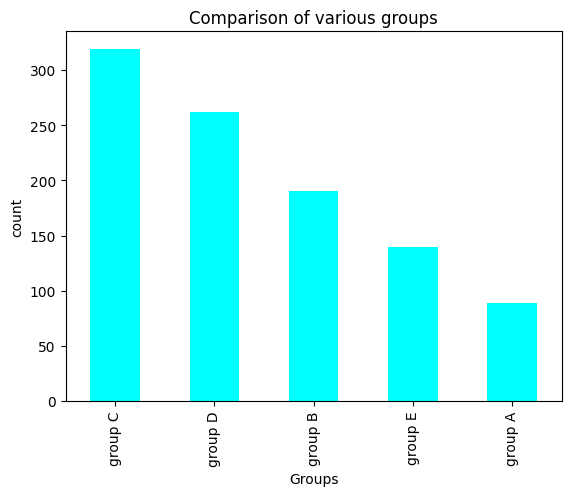

In [ ]:
# visualizing the different groups in the dataset

data['race/ethnicity'].value_counts(normalize = True)
data['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

Data count of student count to ethnicity group.

In [ ]:
# shows the number of students in differnet ethnicity groups

data['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


Comparing Parental education and their highest degree to the count

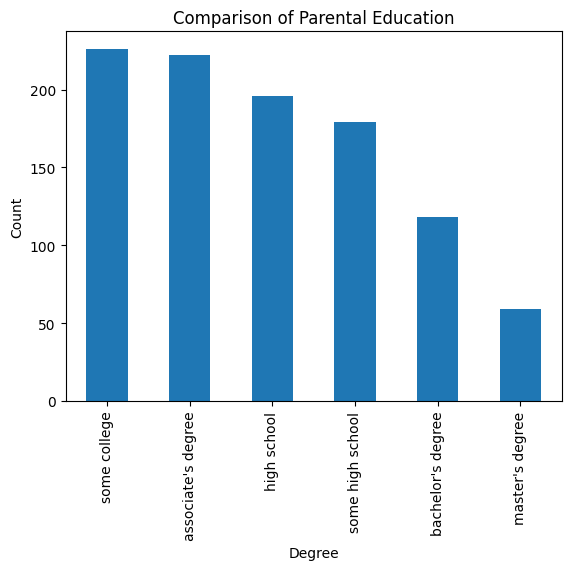

In [ ]:
# visualizing the differnt parental education levels

data['parental_level_of_education'].value_counts(normalize=True)
data['parental_level_of_education'].value_counts(dropna=False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

Comparison of different types of lunch, to the student count

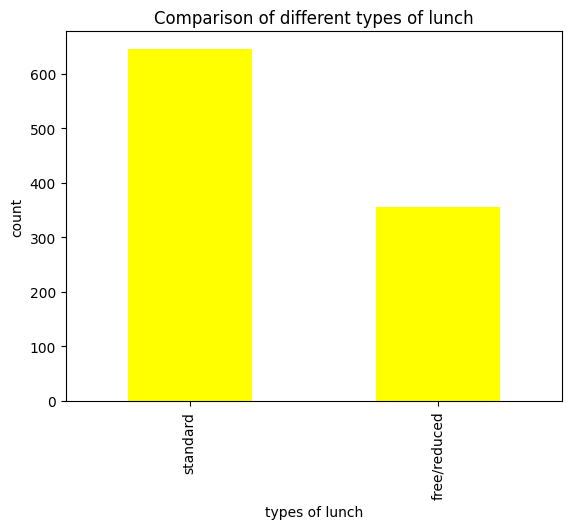

In [ ]:
# visualizing different types of lunch

data['lunch'].value_counts(normalize = True)
data['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Visualization of the math scores to the overall count

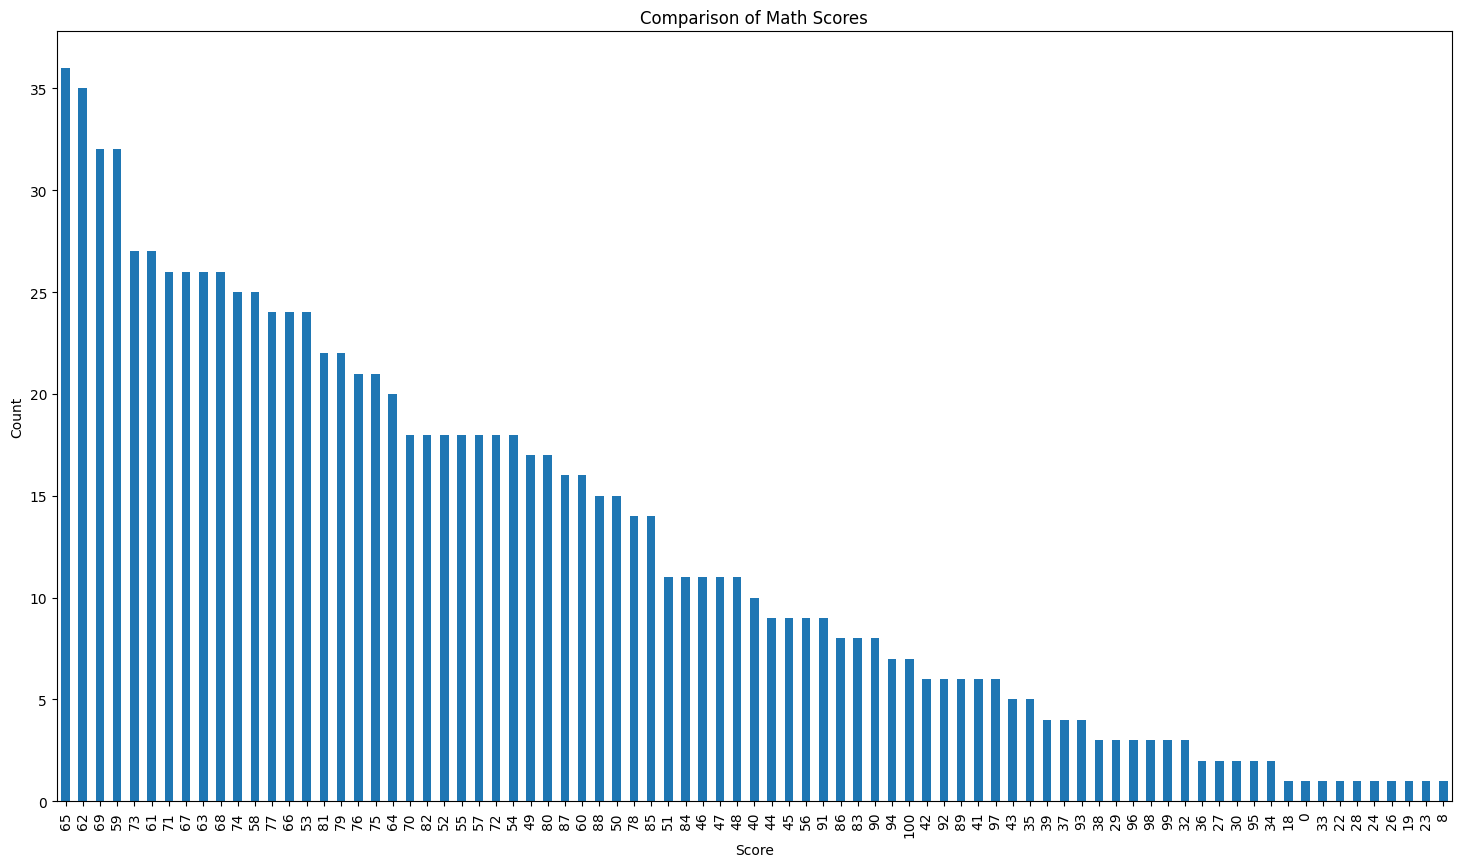

In [ ]:
# visualizing maths score

data['math_score'].value_counts(normalize=True)
data['math_score'].value_counts(dropna=False).plot.bar(figsize=(18, 10))
plt.title('Comparison of Math Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


Reading Scores to count

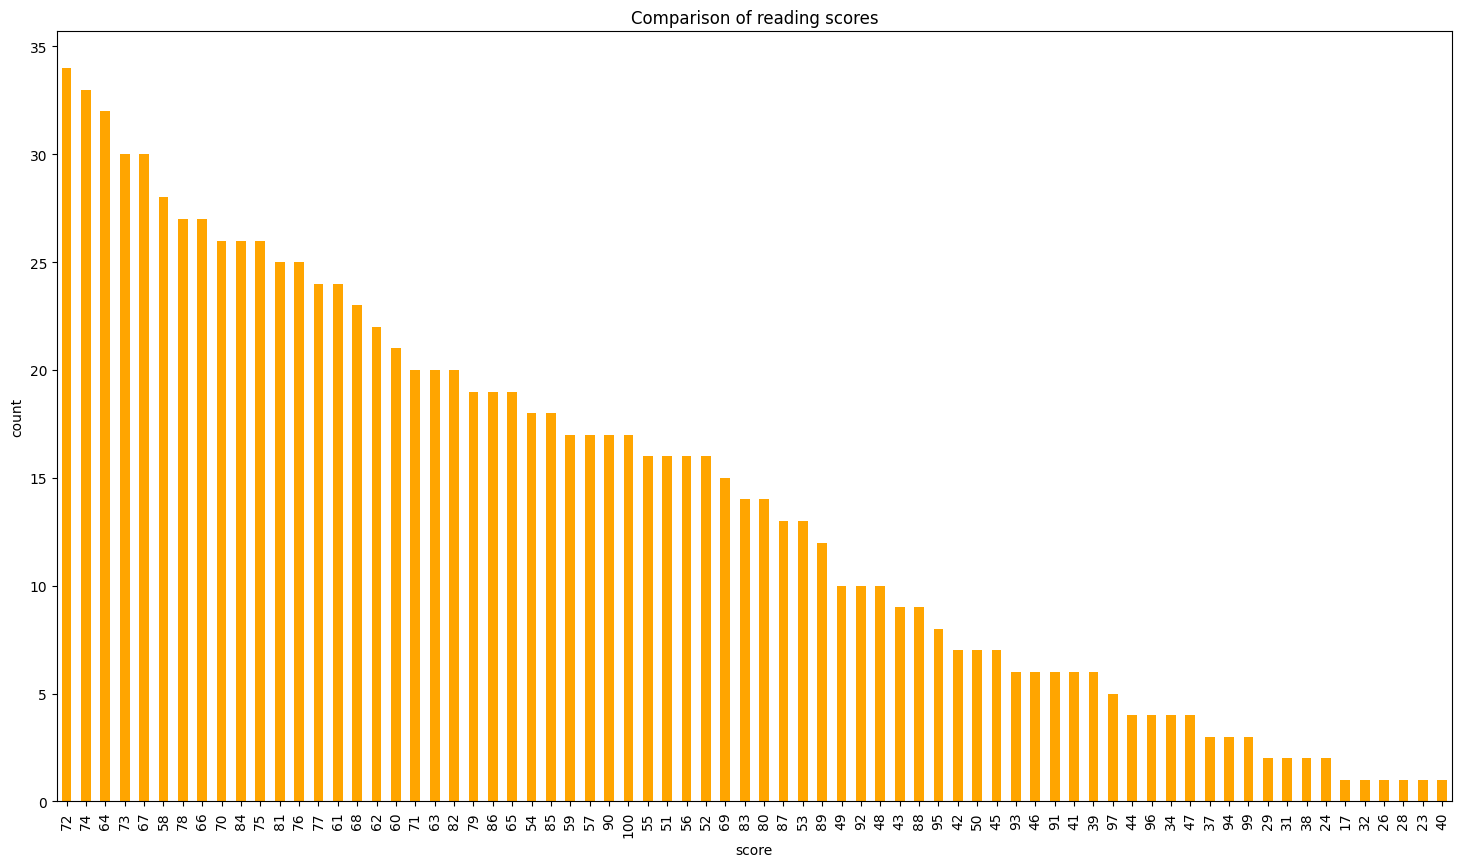

In [ ]:
# visualizing reading score score

data['reading_score'].value_counts(normalize = True)
data['reading_score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of reading scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

Comparison of writing scores to count

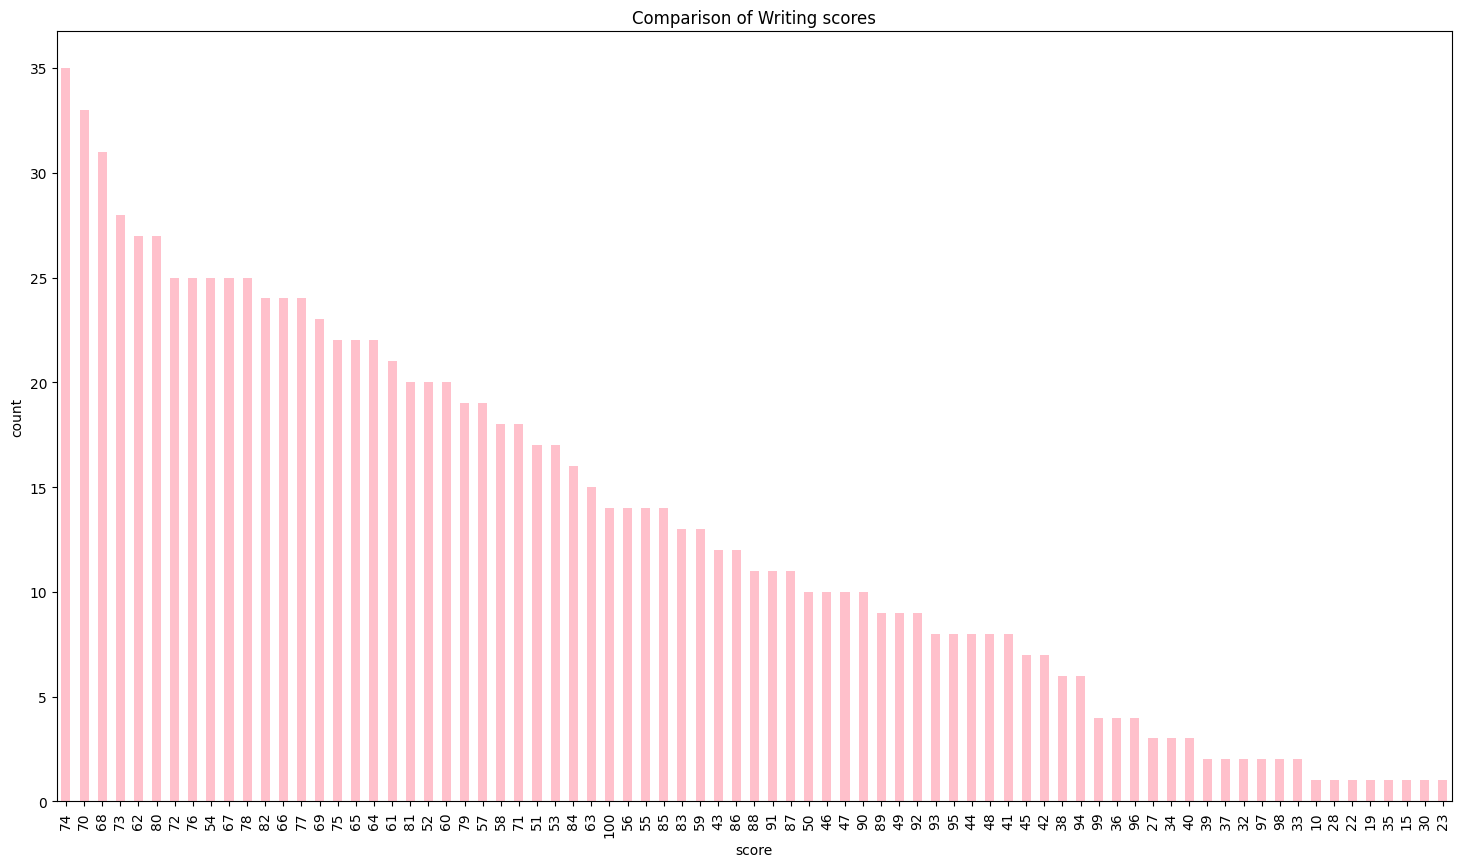

In [ ]:
# visualizing writing score

data['writing_score'].value_counts(normalize = True)
data['writing_score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'pink')
plt.title('Comparison of Writing scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

Gender Vs Race/ethnicity, bar chart


<Axes: xlabel='gender'>

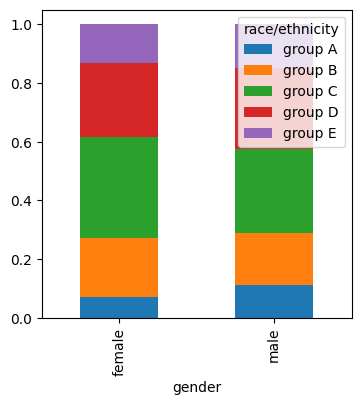

In [ ]:
# gender vs race/etnicity

x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))

The Average scores from race/ethnicity

<ipython-input-44-ae8cd48b4e17>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='race/ethnicity', y='average_score', ci=None, color='coral')


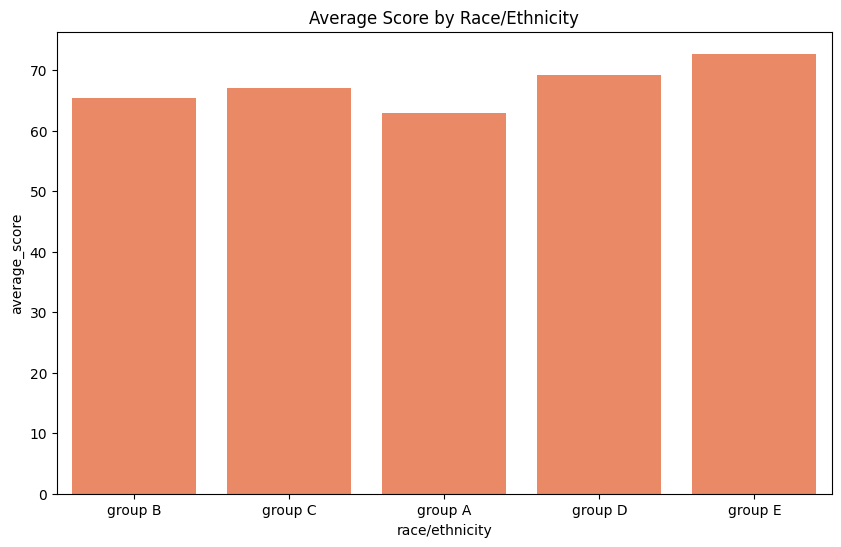

In [ ]:
# Academic Performance Across Racial/Ethnic Groups
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='race/ethnicity', y='average_score', ci=None, color='coral')
plt.title('Average Score by Race/Ethnicity')
plt.show()

Comparing both the race/ethnicity and the parent levle of education


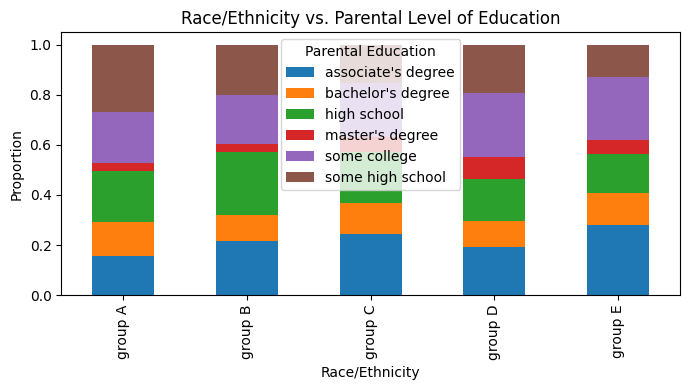

In [ ]:
# comparison of race/ethnicity and parental level of education

x = pd.crosstab(data['race/ethnicity'], data['parental_level_of_education'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(7, 4))
plt.title('Race/Ethnicity vs. Parental Level of Education')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Proportion')
plt.legend(title='Parental Education')
plt.tight_layout()
plt.show()

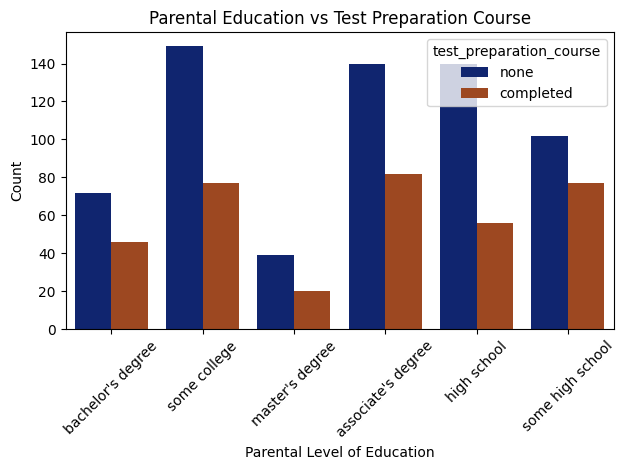

In [ ]:
# comparison of parental degree and test course

sns.countplot(x='parental_level_of_education', data=data, hue='test_preparation_course', palette='dark')
plt.title('Parental Education vs Test Preparation Course')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

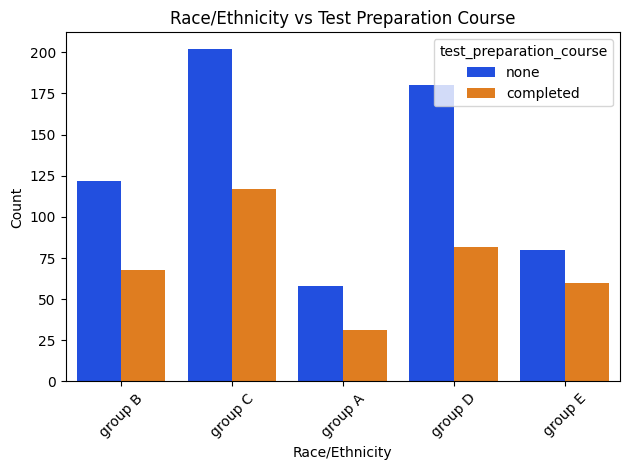

In [ ]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x='race/ethnicity', data=data, hue='test_preparation_course', palette='bright')
plt.title('Race/Ethnicity vs Test Preparation Course')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

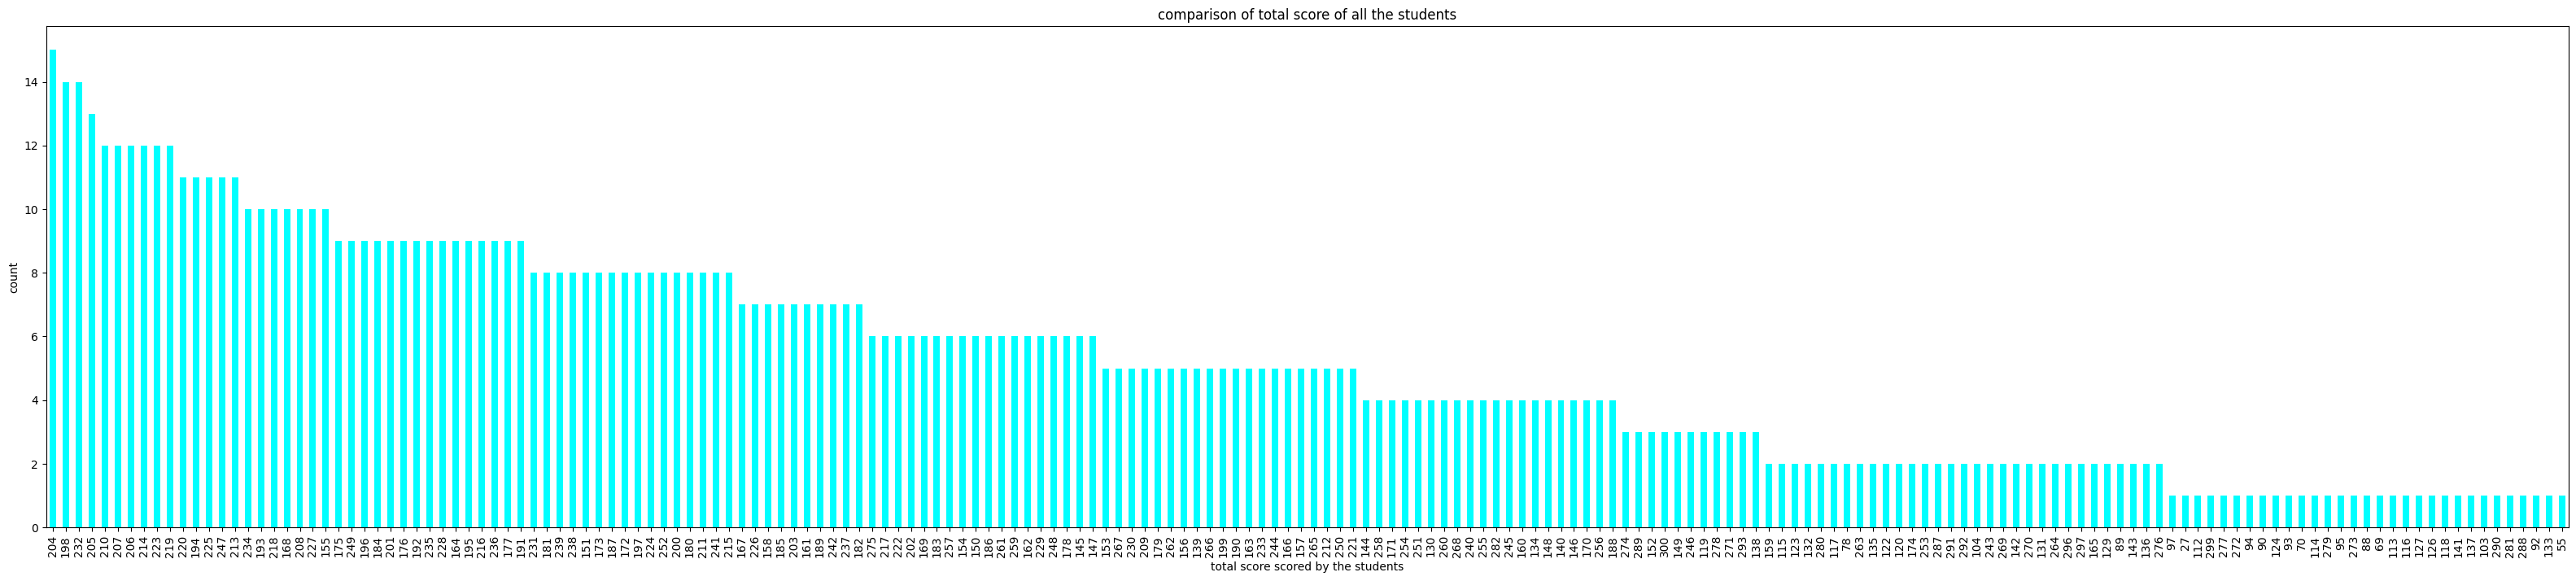

In [ ]:
# computing the total score for each student

data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

data['total_score'].value_counts(normalize = True)
data['total_score'].value_counts(dropna = True).plot.bar(color = 'cyan', figsize = (40, 8))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

Effect of Test Preparation Course

<ipython-input-38-f82428835d13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_preparation_course', y='average_score', data=data, palette=['lightpink', 'deeppink'])


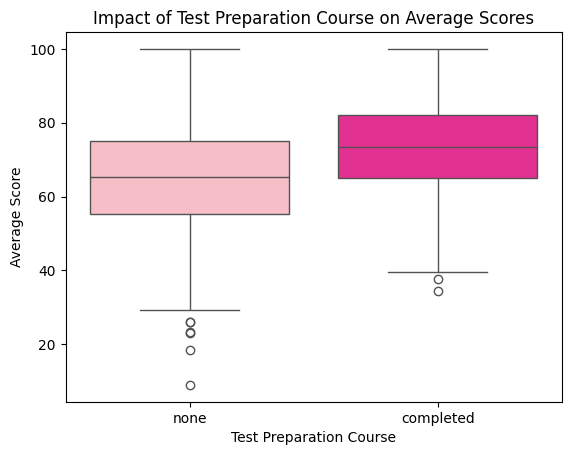

In [ ]:
data['average_score'] = data[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

sns.boxplot(x='test_preparation_course', y='average_score', data=data, palette=['lightpink', 'deeppink'])
plt.title('Impact of Test Preparation Course on Average Scores')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.show()

Sorting Values to check the top ten highest scoring students

In [ ]:
# Top 10 highest-performing students
top_10 = data.sort_values(by='average_score', ascending=False).head(10)
print(top_10[['gender', 'race/ethnicity', 'parental_level_of_education', 'test_preparation_course', 'average_score']])

     gender race/ethnicity parental_level_of_education  \
916    male        group E           bachelor's degree   
962  female        group E          associate's degree   
458  female        group E           bachelor's degree   
114  female        group E           bachelor's degree   
712  female        group D                some college   
179  female        group D            some high school   
165  female        group C           bachelor's degree   
625    male        group D                some college   
685  female        group E             master's degree   
903  female        group D           bachelor's degree   

    test_preparation_course  average_score  
916               completed     100.000000  
962                    none     100.000000  
458                    none     100.000000  
114               completed      99.666667  
712                    none      99.000000  
179               completed      99.000000  
165               completed      98.666667  
6

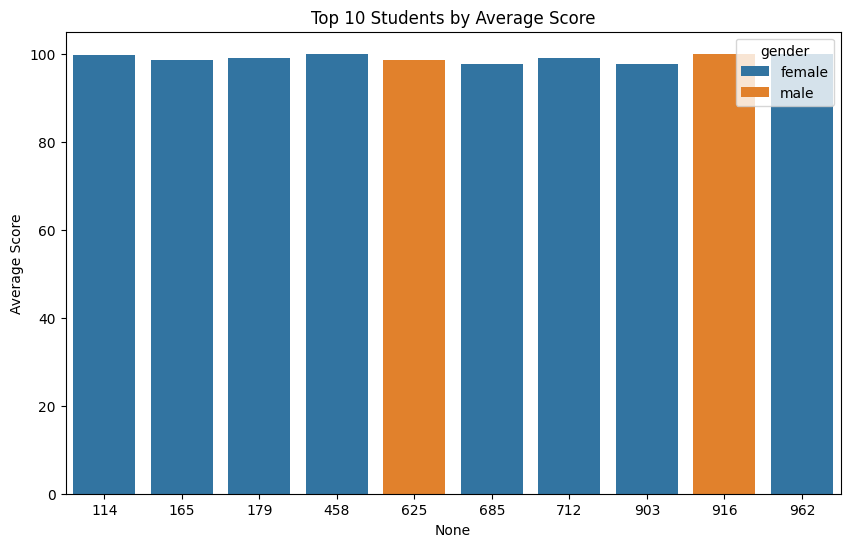

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x=top_10.index, y='average_score', hue='gender')
plt.title('Top 10 Students by Average Score')
plt.ylabel('Average Score')
plt.show()

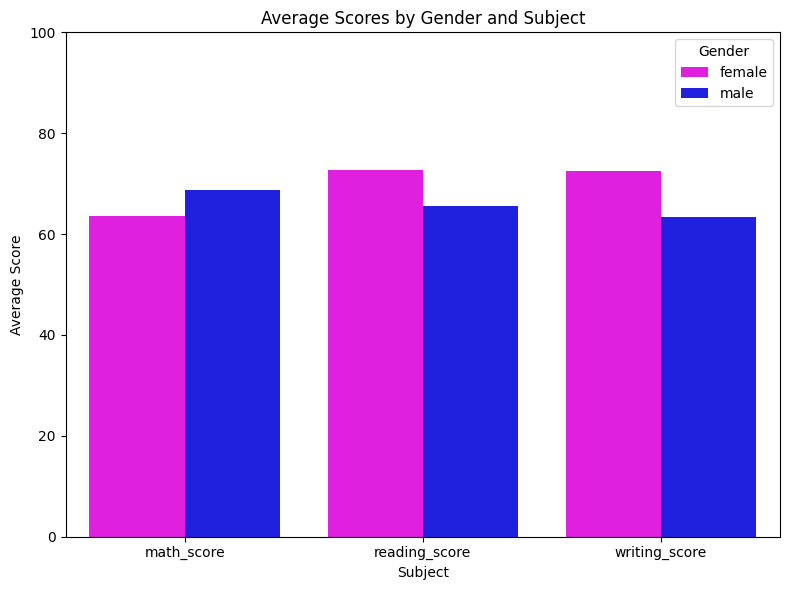

In [ ]:
avg_scores = data.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
avg_scores_long = avg_scores.melt(id_vars='gender',
                                 var_name='Subject',
                                 value_name='Average Score')


plt.figure(figsize=(8, 6))
sns.barplot(data=avg_scores_long, x='Subject', y='Average Score', hue='gender',
            palette={'female': 'magenta', 'male': 'blue'})

plt.title('Average Scores by Gender and Subject')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.ylim(0, 100)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

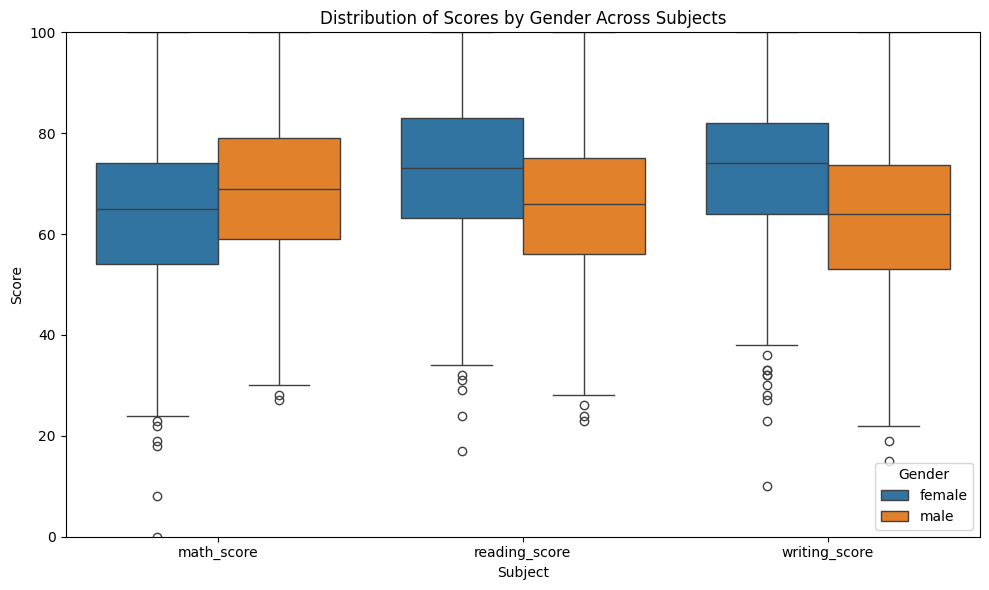

In [ ]:
df_melted = pd.melt(
    data,
    id_vars='gender',
    value_vars=['math_score', 'reading_score', 'writing_score'],
    var_name='Subject',
    value_name='Score'
)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subject', y='Score', hue='gender', data=df_melted)
plt.title('Distribution of Scores by Gender Across Subjects')
plt.ylabel('Score')
plt.xlabel('Subject')
plt.ylim(0, 100)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    data[data['gender'] == 'male']['math_score'],
    data[data['gender'] == 'female']['math_score']
)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


In [ ]:
# Reading
ttest_ind(
    data[data['gender'] == 'male']['reading_score'],
    data[data['gender'] == 'female']['reading_score']
)

# Writing
ttest_ind(
    data[data['gender'] == 'male']['writing_score'],
    data[data['gender'] == 'female']['writing_score']
)


TtestResult(statistic=np.float64(-9.979557910004507), pvalue=np.float64(2.019877706867934e-22), df=np.float64(998.0))

In [ ]:
from scipy.stats import f_oneway

f_oneway(
    *[group['math_score'].values for name, group in data.groupby('race/ethnicity')]
)


F_onewayResult(statistic=np.float64(14.593885166332635), pvalue=np.float64(1.3732194030370688e-11))